# dftdecompose -  Illustrate the decomposition of the image in primitive 2-D waves

This demonstration illustrates the decomposition of a step function image into cossenoidal waves of increasing frequencies.

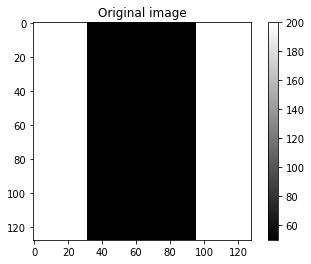

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2
from numpy.fft import ifft2
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

f = 50 * np.ones((128,128))
f[:,     : 32] = 200
f[:,64+32:   ] = 200
plt.imshow(f,cmap='gray')
plt.title('Original image')
plt.colorbar()
plt.show()

- Demonstração da recontrução parcial cumulativa das "telhas" primitivas da imagem sintética acima. É exibida cada telha primitiva, fazendo a reconstrução da iDFT de apenas valores F(u,0) e F(-u,0) para u entre 0 e M-1.

""
DFT

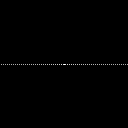

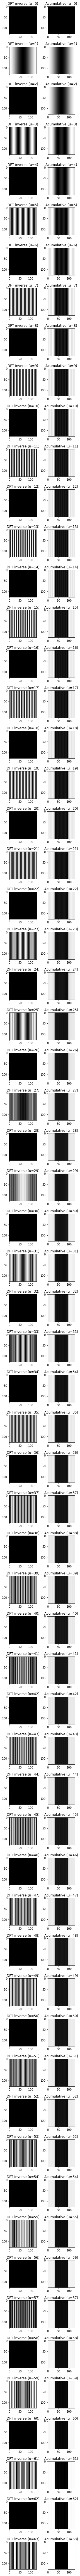

In [2]:
H,W = f.shape
N = W;
rows = (W//2)//(2/2)+1
plt.figure(figsize=[4,rows*2])

#1) Encontre a F = DFT(f) - Transformada Discreta de Fourier; 
F = fft2(f)
E = ia.dftview(F)
ia.adshow(E, title='DFT')

#2) Crie um Faux zerada de mesmo tipo e shape de F. Neste Faux, primeiro coloque o Faux[0,0] = F[0,0] e calcule a inversa de Faux. 
Faux = np.zeros_like(F)
Faux[0,0] = F[0,0]
plt.subplot(rows,2,1)
plt.imshow(np.real(ifft2(Faux)), cmap='gray');
plt.title("DFT inverse (u=0)")

Fsma = np.zeros_like(F)
Fsma = Fsma + Faux
plt.subplot(rows,2,2)    
plt.imshow(np.real(ifft2(Fsma)),cmap='gray')
plt.title("Acumulative (u=%s)" % 0)

#3) repita com u variando de 1 a N/2: copie também F[0,u] e F[0,-u] e calcule a inversa. Lembrar que -u = N-u, pois F é periódica. 
#   Desta forma você vai estar mostrando a reconstrução gradativa da imagem, acrescentando cada vez mais cossenoides. 
#   Eu estou pedindo também para mostrar as cossenoides individuais que serão somadas gradativamente.
row_count = 2;
for u in range(1,N//2):
    Faux = np.zeros_like(F)
    Faux[:,u] = F[:,u]
    Faux[:,N-u] = F[:,N-u] #-u = N-u    
    
    row_count = row_count + 1;
    plt.subplot(rows,2,row_count)    
    plt.imshow(np.real(ifft2(Faux)), cmap='gray');
    plt.title("DFT inverse (u=%s)" % u)
    #print('\nFaux: \n', Faux)
    
    row_count = row_count + 1;
    Fsma = Fsma + Faux    
    plt.subplot(rows,2,row_count)    
    plt.imshow(np.real(ifft2(Fsma)),cmap='gray')
    plt.title("Acumulative (u=%s)" % u)
    #print('\nFsma: \n', Fsma)
    
    
plt.tight_layout()
plt.show()   

In [3]:
diff = np.abs(np.abs(ifft2(Fsma)) - f).sum()                 # compare the orignal and acumlated image
print('Difference between original image and reconstructed: ', diff, " (almost zero)")

Difference between original image and reconstructed:  5.4387783166e-10  (almost zero)


## Contributions

Lucas de Vasconcellos Teixeira, 1st semester 2017